<a href="https://colab.research.google.com/github/cherieuu/Today_I_Learned/blob/master/0624/TS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [4]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33503 entries, 2019-10-01 00:15:00 to 2020-09-13 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       33503 non-null  float64
dtypes: float64(1)
memory usage: 523.5 KB


In [5]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [7]:
df.describe()

,y
count,33503.000000
mean,816.119398
std,34.713666
min,500.700000
25%,797.400000
50%,820.200000
75%,840.000000
max,923.700000


In [8]:
df_day.drop(df_day.index[336], inplace=True)

In [9]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [10]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df_day)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [11]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days #30일을 예측하겠다.
future.tail()

,ds
373,2020-10-09
374,2020-10-10
375,2020-10-11
376,2020-10-12
377,2020-10-13


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
373,2020-10-09,75402.989638,73884.910748,77000.710744
374,2020-10-10,75298.989337,73798.013803,76812.425321
375,2020-10-11,75226.784450,73816.232574,76817.087679
376,2020-10-12,75162.926579,73583.290931,76703.865621
377,2020-10-13,75379.955239,73914.588883,76844.041327


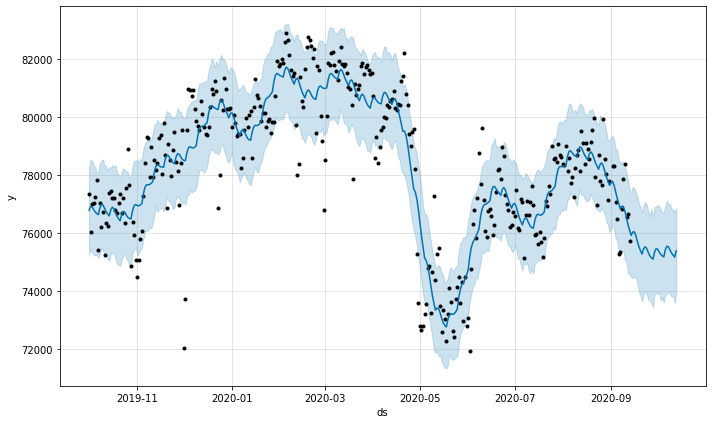

In [15]:
fig1 = m.plot(forecast)

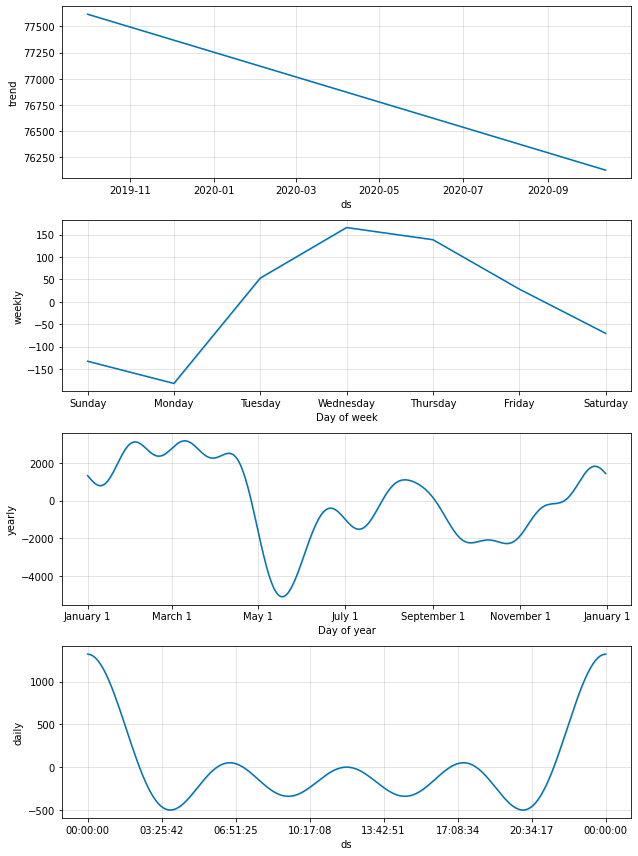

In [16]:
fig2 = m.plot_components(forecast)

In [17]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

#py.init_notebook_mode(connected=True)
py.offline.init_notebook_mode(connected=True)
#py.init_notebook_mode()

In [18]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure

py.iplot(fig)